In [1]:
# Clase para convertir los datos del ASD a la salida de las bandas de los satélites Sentinel 2 y Landsat

import os
import pandas as pd
import numpy as np
import specdal
import matplotlib.pyplot as plt
#from specdal import Collection, Spectrum, read


class asd():

    """Comenzamos el proceso. En la instanciación vamos a pasar 3 parámetros: La ruta al excel con la Spectral Response de los sensores, la ruta
    a la carpeta donde están los archivos .txt y el satélite del que queremos obetenr la respuesta.
    Ideas: -La ruta a la tabla sensores podría quitarse y dejarla fija seguramente incluso que la lea de la web
           -No solo que trabaje con txt sino que use Specdal para usar directamente archivos .asd"""

    def __init__(self, sensores, spec_path, sat):

        self.sensores = sensores
        self.spec_path = spec_path

        #self.pref = pref

        self.sats = {'S2A': ['MSI', 1], 'S2B': ['MSI', 2], 'L8': ['OLI', 3], 'L9': ['OLI', 4], 'L7': ['ETM+', 7], 'L5': ['TM', 6], 'L4': ['TM', 5]}
        self.sensors = {'MSI':
            {"B1": [np.arange(412, 457), 443, 'Coastal blue'],
            "B2": [np.arange(456, 534), 490, 'Blue'],
            "B3": [np.arange(538, 584), 560, 'Green'],
            "B4": [np.arange(646, 685), 665, 'Red'],
            "B5": [np.arange(695, 715), 705, 'Red edge 1'],
            "B6": [np.arange(731, 760), 740, 'Red edge 2'],
            "B7": [np.arange(769, 798), 783, 'Red edge 3'],
            "B8": [np.arange(760, 908), 842, 'Nir'],
            "B8A": [np.arange(837, 882), 865, 'Nir 8A'],
            "B9": [np.arange(932, 959), 945, 'Water vapour'],
            "B10": [np.arange(1337, 1413), 1375, 'Cirrus'],
            "B11": [np.arange(1539, 1683), 1610, 'Swir 1'],
            "B12": [np.arange(2078, 2321), 2190, 'Swir 2']},
                'OLI': 
            {"B1": [np.arange(435, 451), 443, 'Coastal blue'],
            "B2": [np.arange(452, 512), 482, 'Blue'],
            "B3": [np.arange(533, 590), 562, 'Green'],
            "B8": [np.arange(503, 676), 590, 'Pan'],
            "B4": [np.arange(636, 673), 655, 'Red'],
            "B5": [np.arange(851, 879), 865, 'Nir'],
            "B9": [np.arange(1363, 1384), 1374, 'Cirrus'],
            "B6": [np.arange(1566, 1651), 1609, 'Swir 1'],
            "B7": [np.arange(2107, 2294), 2200, 'Swir 2']},
                'ETM+': 
            {"B1": [np.arange(441, 514), 478, 'Blue'],
            "B2": [np.arange(519, 601), 560, 'Green'],
            "B3": [np.arange(631, 692), 662, 'Red'],
            #"B8": [np.arange(515, 896), 705, 'Pan'],
            "B4": [np.arange(772, 898), 835, 'Nir'],
            "B5": [np.arange(1547, 1749), 1648, 'Swir 1'],
            "B7": [np.arange(2064, 2345), 2205, 'Swir 2']}, 
                'TM':  
            {"B1": [np.arange(441, 514), 478, 'Blue'],
            "B2": [np.arange(519, 601), 560, 'Green'],
            "B3": [np.arange(631, 692), 662, 'Red'],
            "B4": [np.arange(772, 898), 835, 'Nir'],
            "B5": [np.arange(1547, 1749), 1648, 'Swir 1'],
            "B7": [np.arange(2080, 2345), 2205, 'Swir 2']}}
        
        
        self.sat = sat
        if sat not in [i for i in self.sats.keys()]:
            print('Available satellites at the moment are "S2A", "S2B", "L8", "L9", "L7", L5" and "L4"')

        self.sensor = self.sats[self.sat][0]
        print("comenzamos!")
        
        self.sat_data = pd.read_excel(self.sensores, sheet_name=self.sats[self.sat][1]) #Indicamos la hoja del excel sensores en la que está el SRF

    
    def get_spectros(self, pref=None):

        """Suena terrorífico pero la idea es que este método devuelva una lista con los txt que hay en la carpeta y sobre esa lista
        vaya aplicando el proceso en bucle. Ideas:
        -No creo que se deba introducir el nombre de los espectros a mano como se hacía en el ejercicio, porque podemos tener un montón en cada carpeta,
        como mucho se podría indicar el prefijo a eliminar. Con ese en el ejemplo del curso se quiatría "curso" y los espectros se llamarían con el
        número que les toque. Ya luego quien esté analizando esto debería de saber que cosa es cada número. No se me ocurre otra manera"""

        
        specs = [os.path.join(self.spec_path, i.strip(pref)) for i in os.listdir(self.spec_path)]
        return specs  
        

    def txt2sat(self, spectra, name=None, plot=True):

        """La idea de este metodo es meter los archivos de txt con las reflectividades y sacar la respuesta espectral para el satelite elegido.
        Ideas: -Hacer otro para plotear (o plotearlos todos?)"""
        
        
        # Seleccionar la columna 1 de "Wavelength" y la columna 10 que se corresponde con "Vegetacion_fresca_hoja_haz" del dataset ASD
        #data_vegetacion = dataset_ASD[['Wavelength', 'Vegetacion_fresca_hoja_haz']]

        #Habría que hacer un bucle para ejecutar el proceso para cada uno de los espectros de de la carpeta
        # for s in self.get_spectros():

        
        if spectra.endswith('.txt'):
            datos_ASD = pd.read_csv(spectra, sep="\t",  decimal=".")  ##Indicamos que el separador decimal es ,
            #columna = datos_ASD.iloc[:, 1]
        elif spectra.endswith('.asd'):
            s = specdal.Spectrum(filepath = spectra)
            datos_ASD = s.measurement.to_frame()
            datos_ASD.reset_index(inplace=True)
        else:
            print('Sorry, but right now we can only process ".txt" and ".asd" files')
            
            
        
        if name != None:
            datos_ASD.columns = ["Wavelength", name]
        else:
            name = os.path.split(spectra)[1].split('.')[0]
            datos_ASD.columns = ["Wavelength", name]

        #print(datos_ASD)
        
        # Cambiar el nombre de las columnas por el que de cada espectro
        """nombres_columnas = ["Wavelength", "Panel_cal_blanco", "Panel_cal_gris1", "Panel_cal_gris2", "Panel_cal_gris3", 
                            "Baldosa_ceramica", "Baldosa_arcilla_seca", "Baldosa_arcilla_mojada", "Baldosa_arcilla_mojada2", 
                            "Vegetacion_fresca_hoja_haz", "Vegetacion_fresca_hoja_enves", "Vegetacion_fresca_hojas_superpuestas_haz", 
                            "Vegetacion_seca_hoja_haz", "Mezcla_veg_suelo_1", "Mezcla_veg_suelo_2", "Hoja_enferma", "Vegetacion_dosel_1",
                            "Vegetacion_dosel_2", "Materia_organica_seca", "Materia_organica_mojada", "Arena_seca", "Arena_mojada", 
                            "Materia_organica_arena_seca_seca", "Bolsa_negra"]
        dataset_ASD.columns = nombres_columnas"""

        # Eliminar banda < 400 nm
        datos_ASD = datos_ASD[datos_ASD['Wavelength'] >= 400]
        
        #print(datos_ASD)
                    
        
        # Crear una lista para almacenar los data frames cortados
        sat_data_cortados = []
        data_txt_cortados = []
        
        # Realizar el corte en ambos data frames para cada vector
        for banda, rango in self.sensors[self.sensor].items():
            #print(b, r[0]):
            sat_data_cortados.append(self.sat_data[(self.sat_data['SR_WL'] >= min(rango[0])) & (self.sat_data['SR_WL'] <= max(rango[0]))])
            data_txt_cortados.append(datos_ASD[(datos_ASD['Wavelength'] >= min(rango[0])) & (datos_ASD['Wavelength'] <= max(rango[0]))])
            
            
        # Especificar las columnas a mantener para cada data frame
        columnas_a_mantener = [[0, i] for i in range(1, len(self.sensors[self.sensor])+1)]
        
        
        # Aplicar la selección de columnas para cada data frame        
        for i in range(len(self.sensors[self.sensor])):
            sat_data_cortados[i] = sat_data_cortados[i].iloc[:, columnas_a_mantener[i]]
            #data_txt_cortados[i] = data_txt_cortados[i].iloc[:, columnas_a_mantener[i]]        
        
        # Crear una lista para almacenar los resultados de la media ponderada
        resultados_media_ponderada_sat = []
        
        # Realizar la media ponderada para cada par de data frames en las listas
        for i in range(len(self.sensors[self.sensor])):
            peso_sat = sat_data_cortados[i].iloc[:, 1]  # Usamos la segunda columna de data_sentinel_cortados como peso
            datos_txt = data_txt_cortados[i].iloc[:, 1]  # Usamos la segunda columna de data_vegetacion_cortados
        
            # Calcular la media ponderada
            media_ponderada_sat = np.average(datos_txt, weights=peso_sat)
            resultados_media_ponderada_sat.append(media_ponderada_sat)          
        
        # Crear un DataFrame a partir de los resultados de las medias ponderadas
        fname = 'MediaPonderada'+self.sat
        datos_sat_pond = pd.DataFrame({fname: resultados_media_ponderada_sat})        
        
        # Establecer los nombres de fila en el DataFrame
        nombres_filas = [k for k, v in self.sensors[self.sensor].items()]
        datos_sat_pond.index = nombres_filas
        
        # Crear una nueva columna con el centro de las longitudes de onda correspondientes a cada banda 
        wavelength = [v[1] for k, v in self.sensors[self.sensor].items()]
        datos_sat_pond['Wavelength'] = wavelength
        #dataset_Sentinel_L8 = dataset_Sentinel_L8.sort_values(['Wavelength'])
        # Visualizar el DataFrame con los nuevos nombres de fila
        print(datos_sat_pond)
        
        # Ploteamos los datos por defecto cuando estamos haciendo solo un perfil
        # La idea sería pasar plot=False cuando lo hagamos en bucle para todos los archivos de una carpeta
        if plot == True:
            
            # Crear el gráfico
            plt.figure(figsize=(10, 6))
            # Perfil espectral
            plt.plot(datos_ASD['Wavelength'], datos_ASD[name], label=name, color='green')
            # Sat values
            plt.ylim(0, 1)
            plt.plot(datos_sat_pond['Wavelength'], datos_sat_pond[fname], label=fname, color='red')
            plt.xlabel('Wavelength (nm)')
            plt.ylabel('Reflectance')
            title = 'Comparación ASD - ' + self.sat
            plt.title(title)
            plt.legend()
            plt.grid(True)
            plt.show()         
            
            
    def specs2sat(self):
        
        """Aqui habría que crear un dataframe con los valores de las bandas de un satelite para cada uno de los espectros """        
        pass
    
    
    def spec2sats(self):
        
        """Tabla para cada espectro con los valores de las bandas de todos los satélites.
        Hay que decidir si merece la pena meter estos dos como método, porque realmente se puede hacer construyendo la llamada con bucles"""
        pass
    


comenzamos!
    MediaPonderadaL8  Wavelength
B1          0.048054         443
B2          0.048842         482
B3          0.085617         562
B8          0.065352         590
B4          0.048076         655
B5          0.655616         865
B9          0.425780        1374
B6          0.357731        1609
B7          0.170345        2200


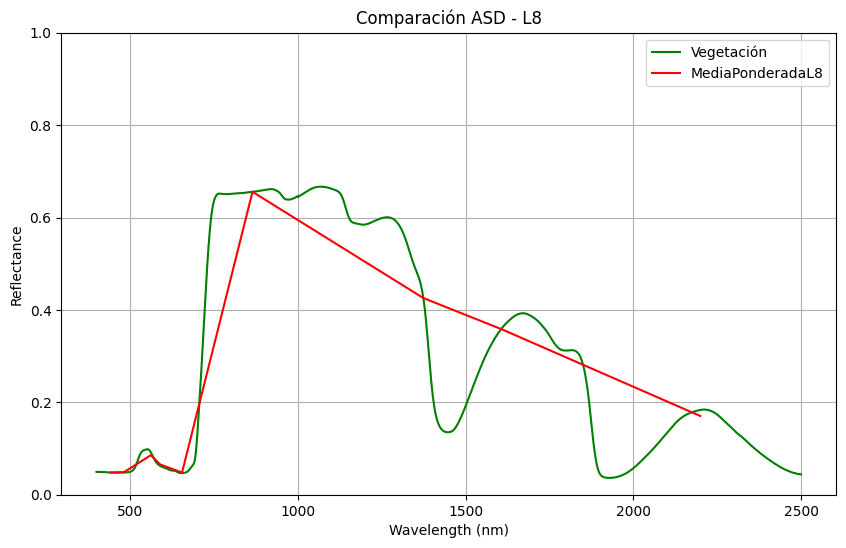

In [4]:
sensores_table = '/home/diego/git/Netops_Cadiz/spectral_response/sensores_srs.xlsx' #ruta al xlsx
spec_path_asd = "/media/diego/Datos4/EBD/Cursos/AET_2024_NetOPS/Para_alumnos/Sesion4/4.1.procesado/Datos_ASD/2024_06_04/curso00007.asd"
spec_path_txt = "/media/diego/Datos4/EBD/Cursos/AET_2024_NetOPS/Para_alumnos/Sesion4/4.1.procesado/Datos_TXT/2024_06_04/curso00007.asd.txt"


a = asd(sensores_table, spec_path_asd, 'L8')
a.txt2sat(spec_path_asd, "Vegetación")

### Bucle para hacer varios satélites a la vez

comenzamos!
     MediaPonderadaS2A  Wavelength
B1            0.048094         443
B2            0.052443         490
B3            0.089772         560
B4            0.049386         665
B5            0.172334         705
B6            0.588570         740
B7            0.650709         783
B8            0.653435         842
B8A           0.655640         865
B9            0.653301         945
B10           0.418705        1375
B11           0.361014        1610
B12           0.171078        2190


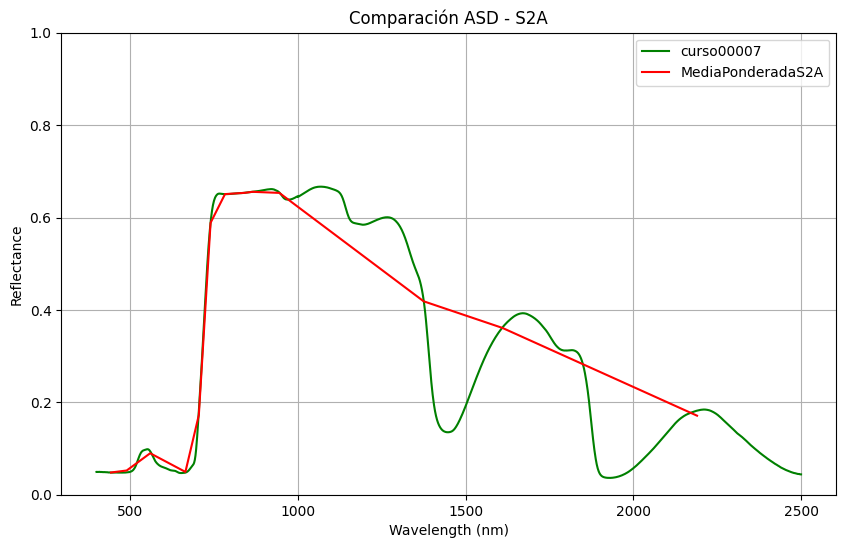

comenzamos!
    MediaPonderadaL8  Wavelength
B1          0.048054         443
B2          0.048842         482
B3          0.085617         562
B8          0.065352         590
B4          0.048076         655
B5          0.655616         865
B9          0.425780        1374
B6          0.357731        1609
B7          0.170345        2200


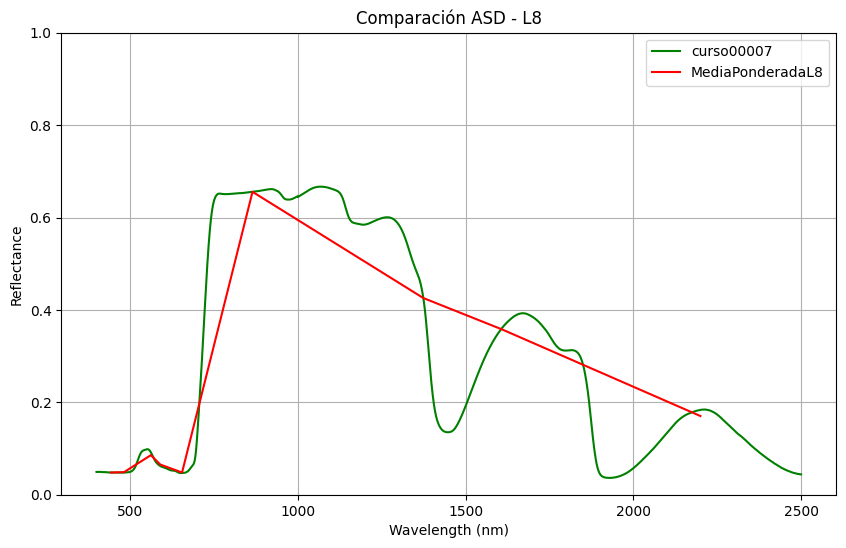

comenzamos!
    MediaPonderadaL5  Wavelength
B1          0.049049         478
B2          0.080417         560
B3          0.051948         662
B4          0.653656         835
B5          0.368829        1648
B7          0.160773        2205


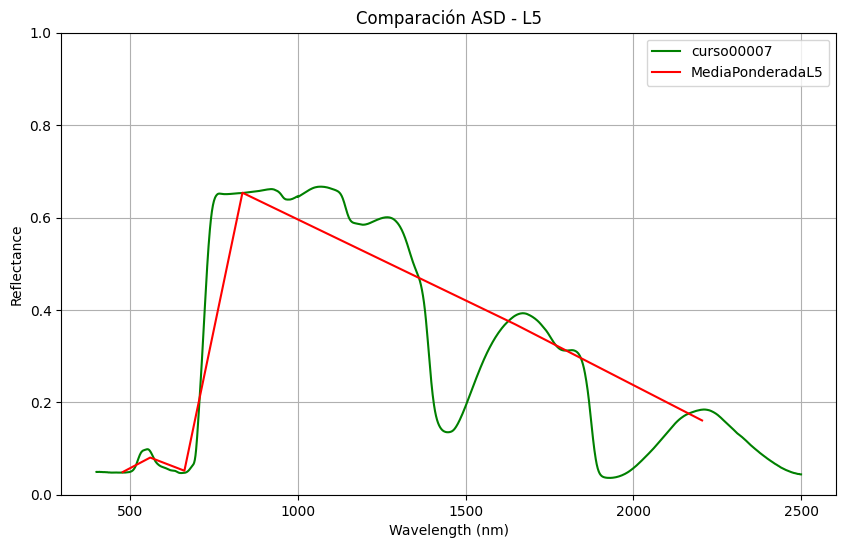

In [8]:
s = ['S2A', 'L8', 'L5']
for ss in s:    
    a = asd(sensores_table, spec_path_asd, ss)
    a.txt2sat(spec_path_asd)

### Bucle para todos los archivos de una carpeta (lo suyo sería poder plot==False para evitar tanta gráfica y quedarse solo con los datos

comenzamos!
    MediaPonderadaL8  Wavelength
B1          0.048054         443
B2          0.048842         482
B3          0.085617         562
B8          0.065352         590
B4          0.048076         655
B5          0.655616         865
B9          0.425780        1374
B6          0.357731        1609
B7          0.170345        2200


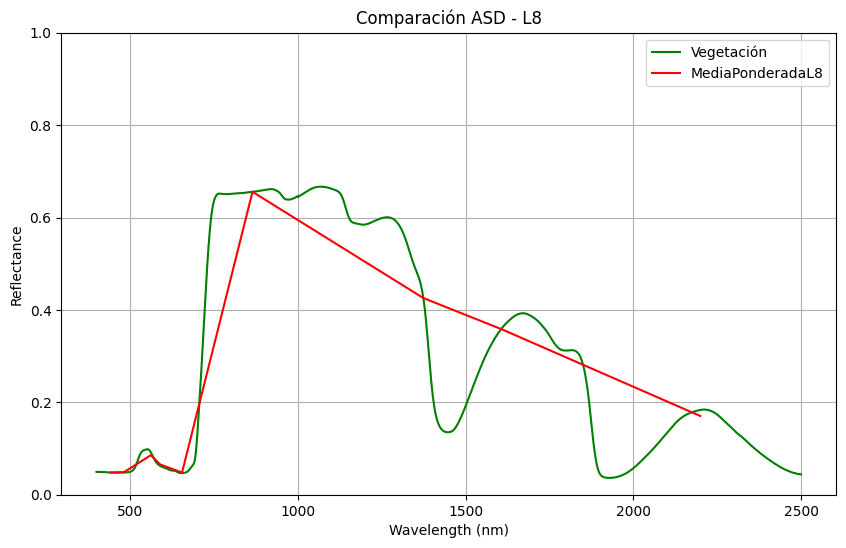

comenzamos!
    MediaPonderadaL8  Wavelength
B1          0.991500         443
B2          0.991719         482
B3          0.991440         562
B8          0.991389         590
B4          0.991250         655
B5          0.990486         865
B9          0.986924        1374
B6          0.986342        1609
B7          0.955232        2200


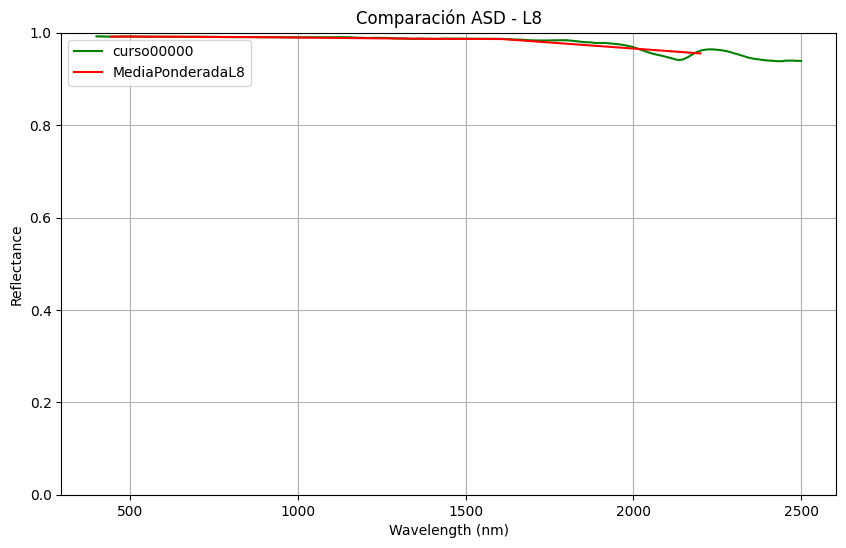

comenzamos!
    MediaPonderadaL8  Wavelength
B1          0.105156         443
B2          0.114138         482
B3          0.181465         562
B8          0.239076         590
B4          0.331390         655
B5          0.399515         865
B9          0.434338        1374
B6          0.454238        1609
B7          0.531260        2200


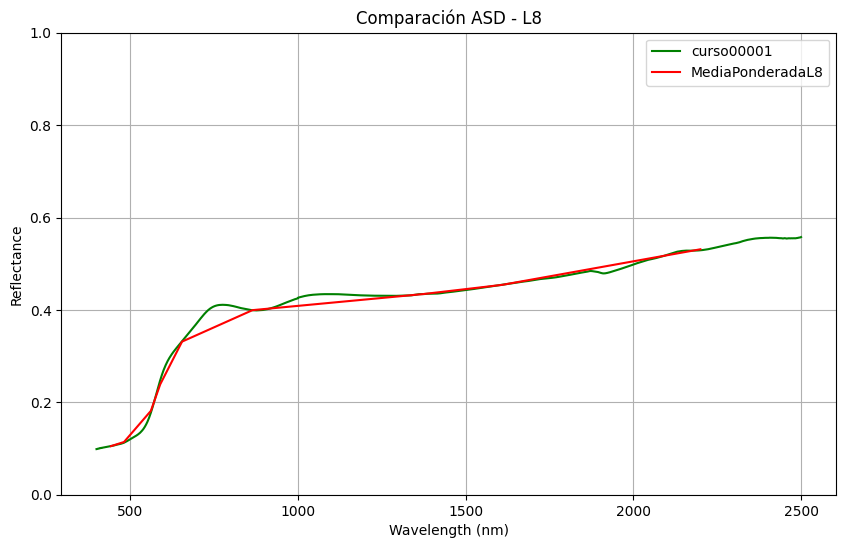

comenzamos!
    MediaPonderadaL8  Wavelength
B1          0.703456         443
B2          0.718933         482
B3          0.723559         562
B8          0.721334         590
B4          0.716967         655
B5          0.692909         865
B9          0.622684        1374
B6          0.604286        1609
B7          0.591534        2200


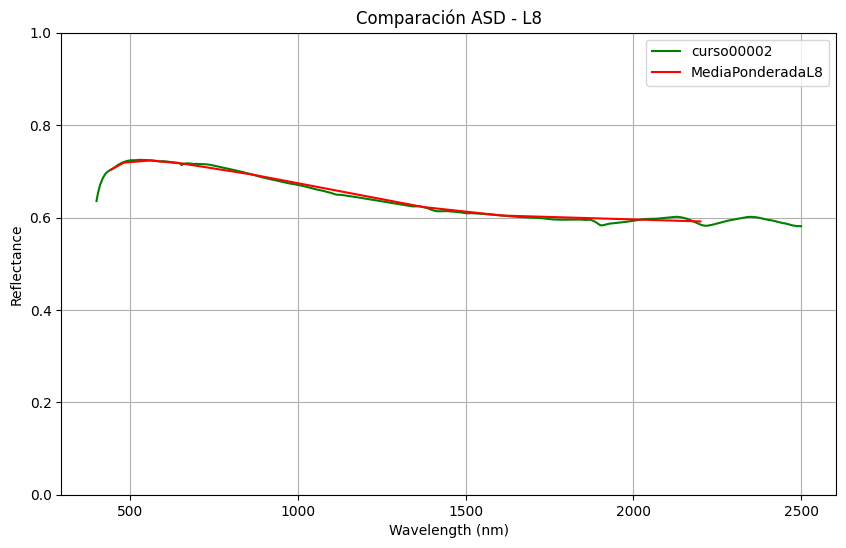

comenzamos!
    MediaPonderadaL8  Wavelength
B1          0.058145         443
B2          0.063382         482
B3          0.113580         562
B8          0.160910         590
B4          0.235723         655
B5          0.282513         865
B9          0.260856        1374
B6          0.262200        1609
B7          0.250707        2200


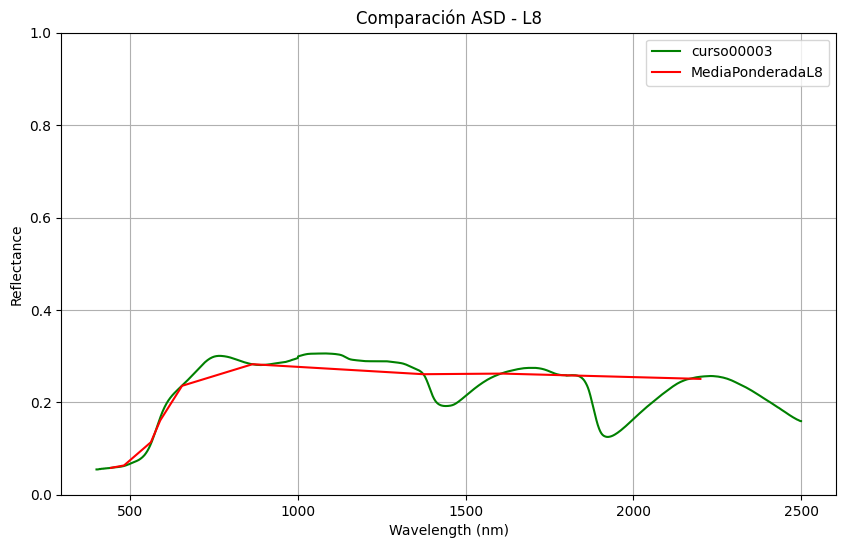

comenzamos!
    MediaPonderadaL8  Wavelength
B1          0.074230         443
B2          0.079525         482
B3          0.129241         562
B8          0.176036         590
B4          0.250084         655
B5          0.297150         865
B9          0.308739        1374
B6          0.320178        1609
B7          0.359808        2200


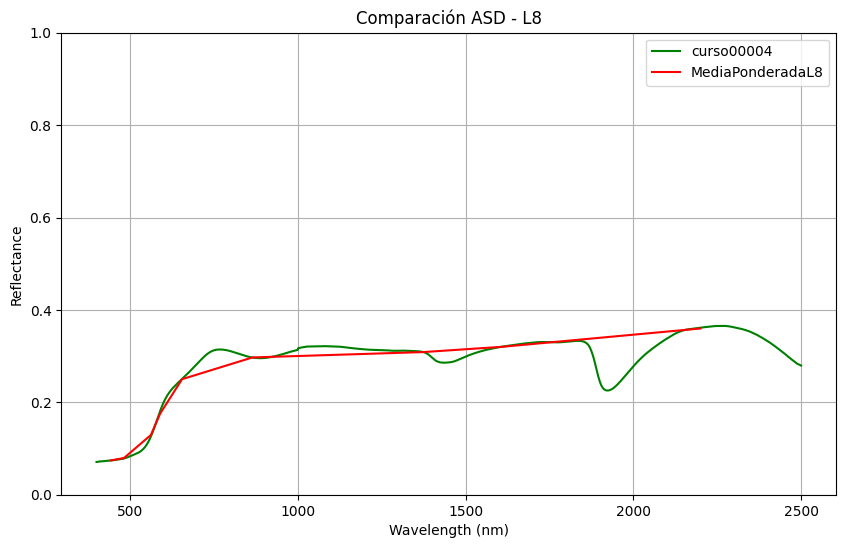

comenzamos!
    MediaPonderadaL8  Wavelength
B1          0.040160         443
B2          0.043868         482
B3          0.104557         562
B8          0.074377         590
B4          0.044114         655
B5          0.450320         865
B9          0.303837        1374
B6          0.281940        1609
B7          0.115215        2200


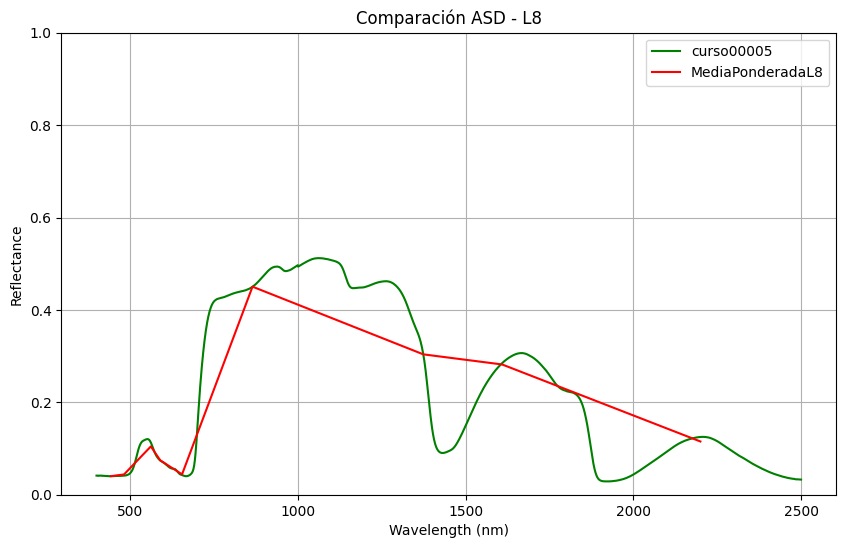

comenzamos!
    MediaPonderadaL8  Wavelength
B1          0.085491         443
B2          0.102041         482
B3          0.180812         562
B8          0.150693         590
B4          0.112489         655
B5          0.343084         865
B9          0.322134        1374
B6          0.294858        1609
B7          0.170081        2200


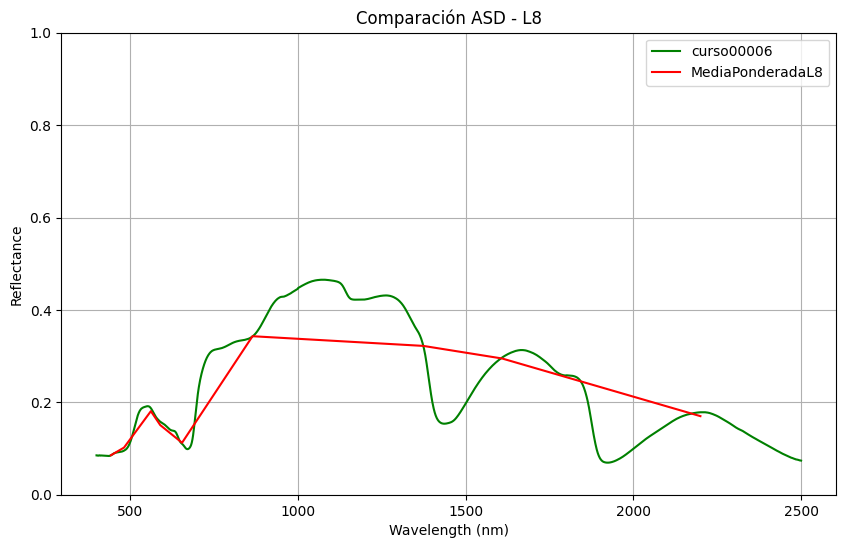

comenzamos!
    MediaPonderadaL8  Wavelength
B1          0.047604         443
B2          0.048396         482
B3          0.084817         562
B8          0.064739         590
B4          0.047618         655
B5          0.648882         865
B9          0.419671        1374
B6          0.352638        1609
B7          0.162686        2200


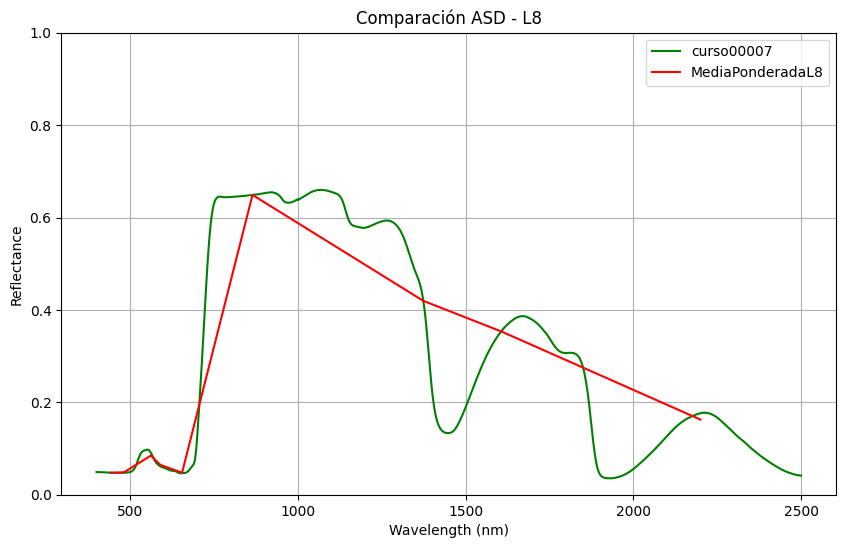

comenzamos!
    MediaPonderadaL8  Wavelength
B1          0.092134         443
B2          0.132761         482
B3          0.372315         562
B8          0.372785         590
B4          0.398716         655
B5          0.456876         865
B9          0.296313        1374
B6          0.270011        1609
B7          0.130216        2200


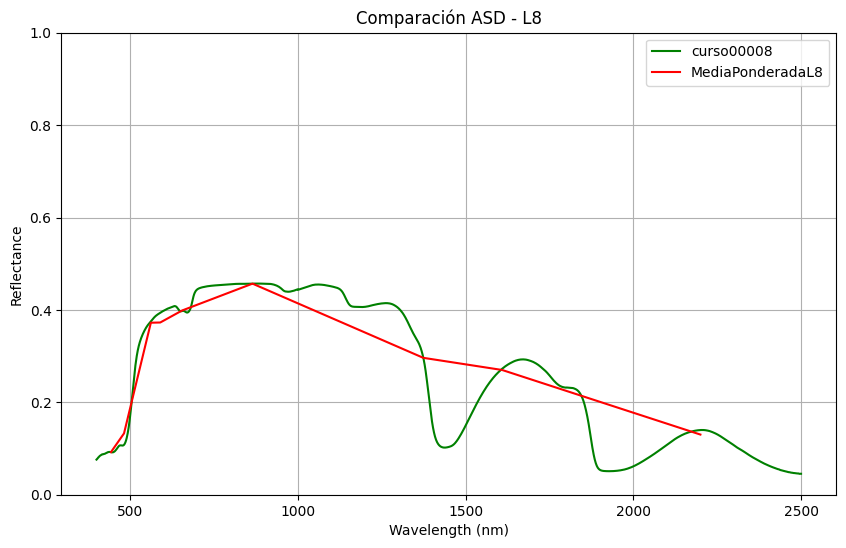

comenzamos!
    MediaPonderadaL8  Wavelength
B1          0.041062         443
B2          0.049420         482
B3          0.083072         562
B8          0.105526         590
B4          0.149827         655
B5          0.410500         865
B9          0.524013        1374
B6          0.493820        1609
B7          0.384618        2200


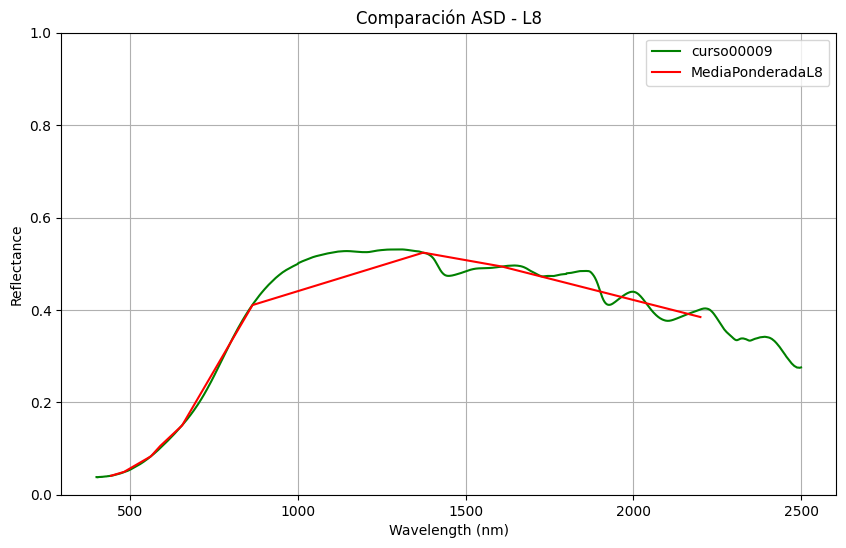

comenzamos!
    MediaPonderadaL8  Wavelength
B1          0.052121         443
B2          0.064096         482
B3          0.115631         562
B8          0.098394         590
B4          0.073950         655
B5          0.413426         865
B9          0.432536        1374
B6          0.422368        1609
B7          0.365651        2200


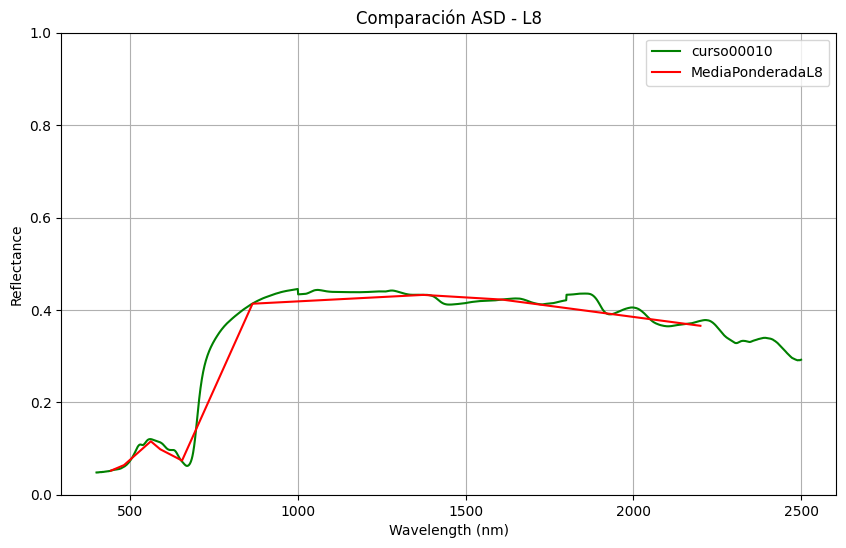

comenzamos!
    MediaPonderadaL8  Wavelength
B1          0.017092         443
B2          0.019298         482
B3          0.026396         562
B8          0.032105         590
B4          0.043650         655
B5          0.134174         865
B9          0.315628        1374
B6          0.317748        1609
B7          0.251598        2200


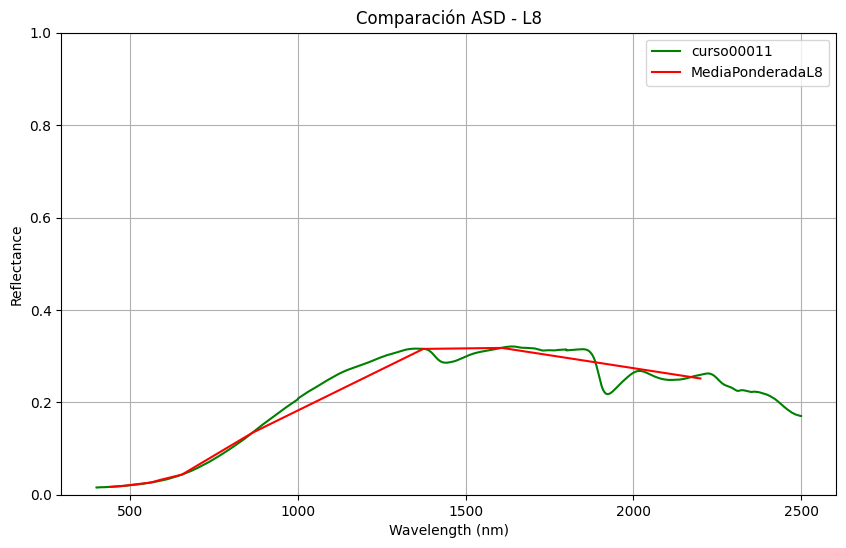

comenzamos!
    MediaPonderadaL8  Wavelength
B1          0.009813         443
B2          0.010401         482
B3          0.013153         562
B8          0.016222         590
B4          0.022432         655
B5          0.093436         865
B9          0.198203        1374
B6          0.182937        1609
B7          0.100935        2200


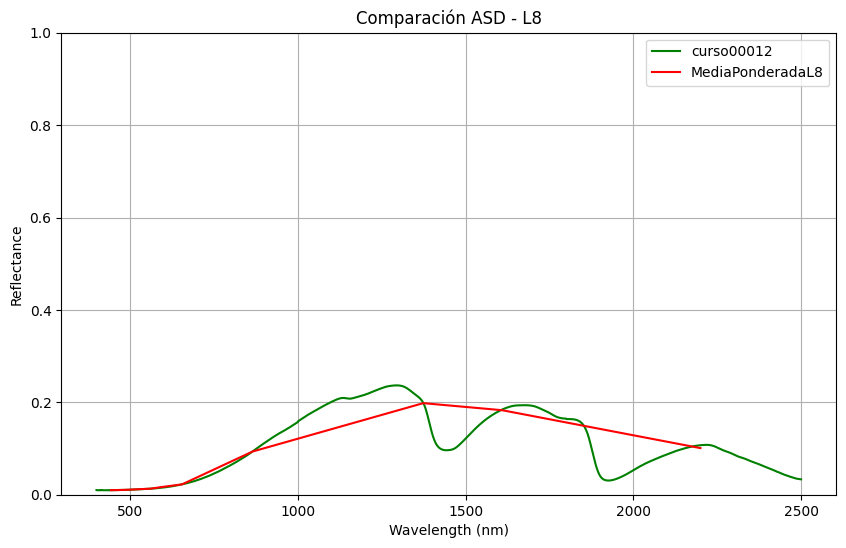

comenzamos!
    MediaPonderadaL8  Wavelength
B1          0.179143         443
B2          0.201928         482
B3          0.274523         562
B8          0.289425         590
B4          0.323602         655
B5          0.368717         865
B9          0.425076        1374
B6          0.438137        1609
B7          0.400874        2200


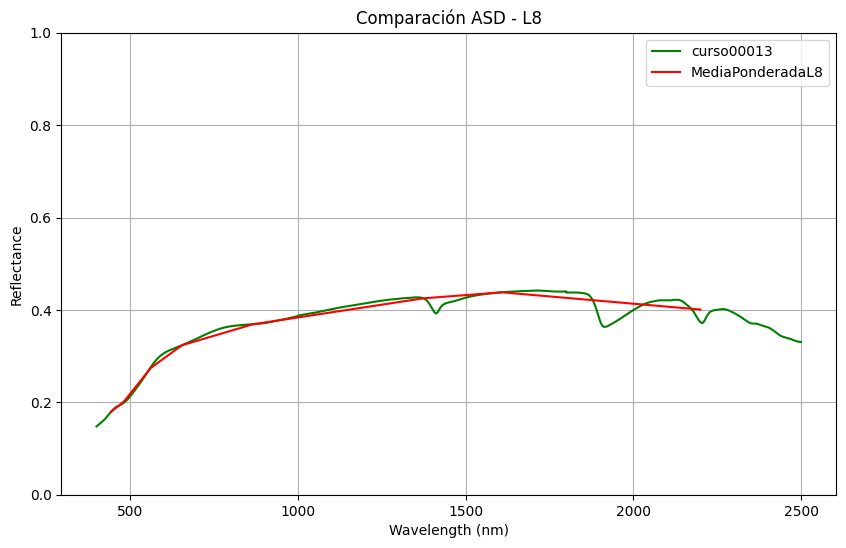

comenzamos!
    MediaPonderadaL8  Wavelength
B1          0.183772         443
B2          0.203883         482
B3          0.264349         562
B8          0.275888         590
B4          0.302960         655
B5          0.336237         865
B9          0.378359        1374
B6          0.384231        1609
B7          0.342848        2200


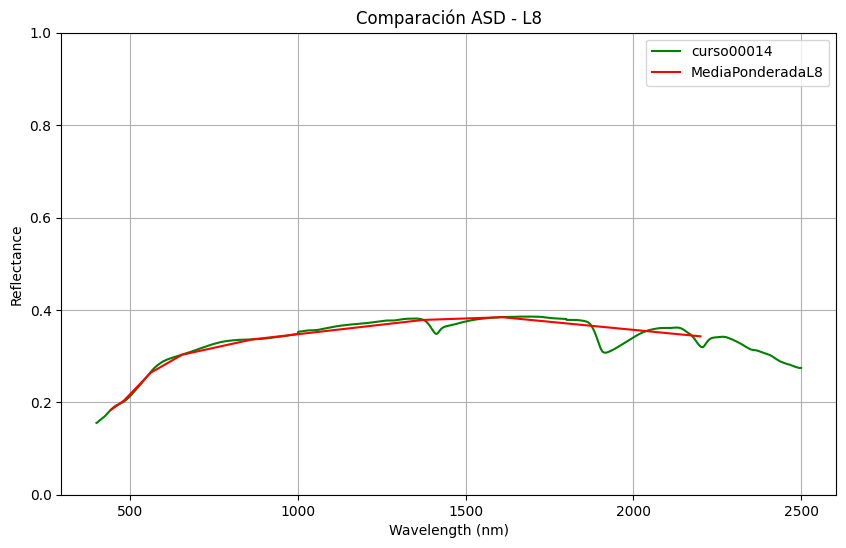

comenzamos!
    MediaPonderadaL8  Wavelength
B1          0.072180         443
B2          0.079290         482
B3          0.099863         562
B8          0.106498         590
B4          0.121117         655
B5          0.197958         865
B9          0.346555        1374
B6          0.343870        1609
B7          0.277409        2200


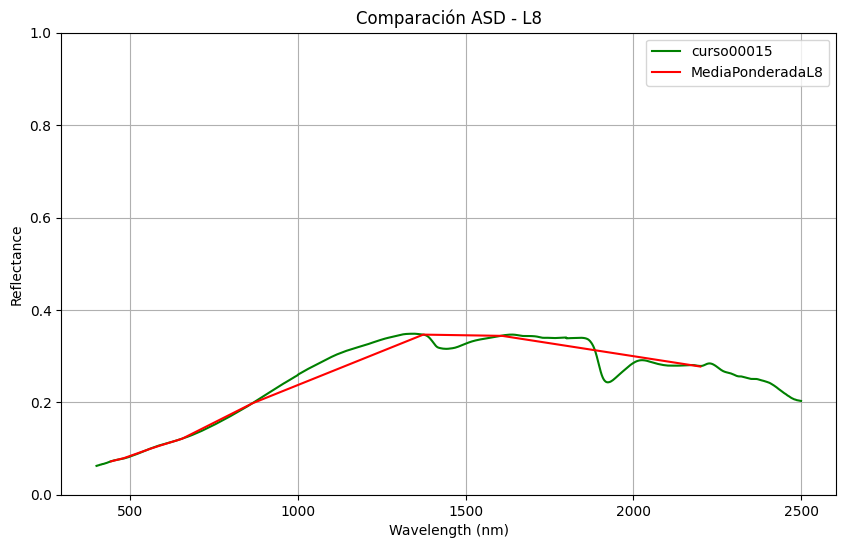

comenzamos!
    MediaPonderadaL8  Wavelength
B1          0.149853         443
B2          0.168139         482
B3          0.220796         562
B8          0.232003         590
B4          0.257637         655
B5          0.306395         865
B9          0.376525        1374
B6          0.386729        1609
B7          0.348969        2200


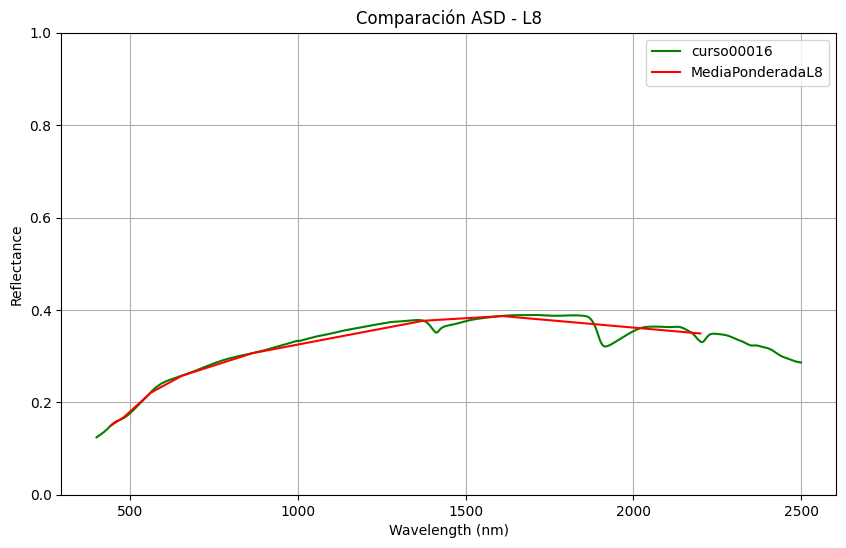

comenzamos!
    MediaPonderadaL8  Wavelength
B1          0.010500         443
B2          0.011303         482
B3          0.021205         562
B8          0.018712         590
B4          0.018223         655
B5          0.150503         865
B9          0.223684        1374
B6          0.207358        1609
B7          0.116973        2200


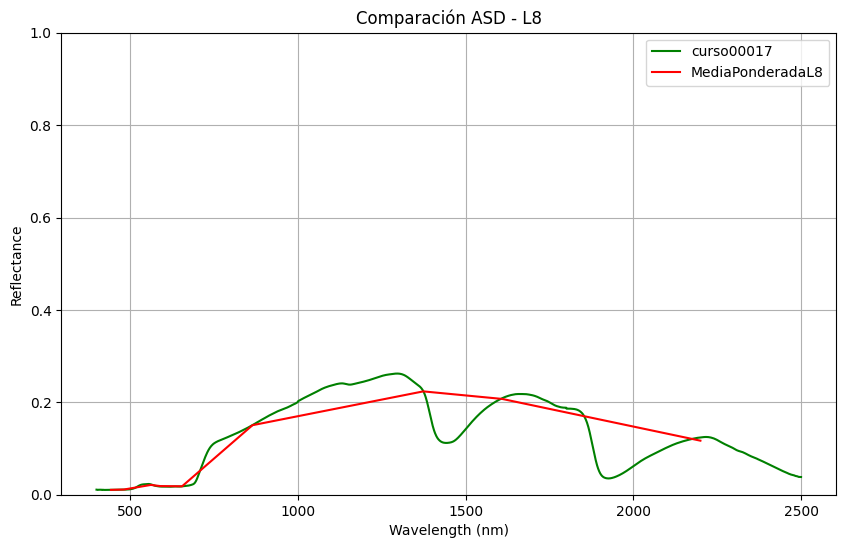

comenzamos!
    MediaPonderadaL8  Wavelength
B1          0.025888         443
B2          0.026927         482
B3          0.049618         562
B8          0.038412         590
B4          0.028878         655
B5          0.301929         865
B9          0.282528        1374
B6          0.257949        1609
B7          0.141849        2200


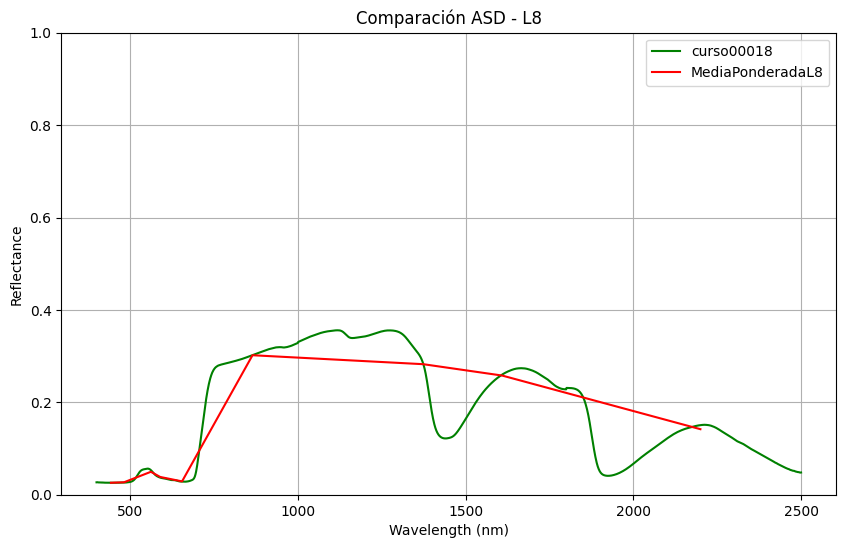

comenzamos!
    MediaPonderadaL8  Wavelength
B1          0.031918         443
B2          0.038450         482
B3          0.064527         562
B8          0.081407         590
B4          0.114660         655
B5          0.297428         865
B9          0.426808        1374
B6          0.397252        1609
B7          0.294208        2200


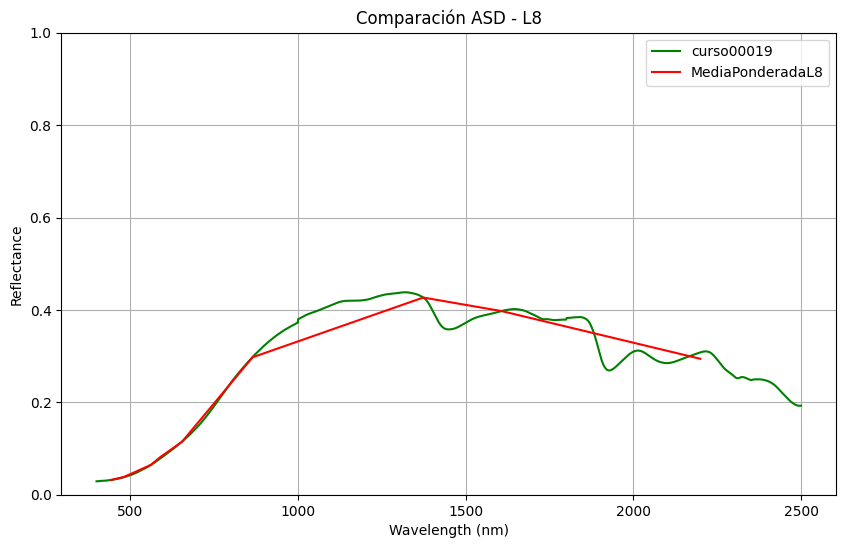

comenzamos!
    MediaPonderadaL8  Wavelength
B1          0.017926         443
B2          0.020455         482
B3          0.057064         562
B8          0.039651         590
B4          0.022812         655
B5          0.218440         865
B9          0.148269        1374
B6          0.126178        1609
B7          0.062773        2200


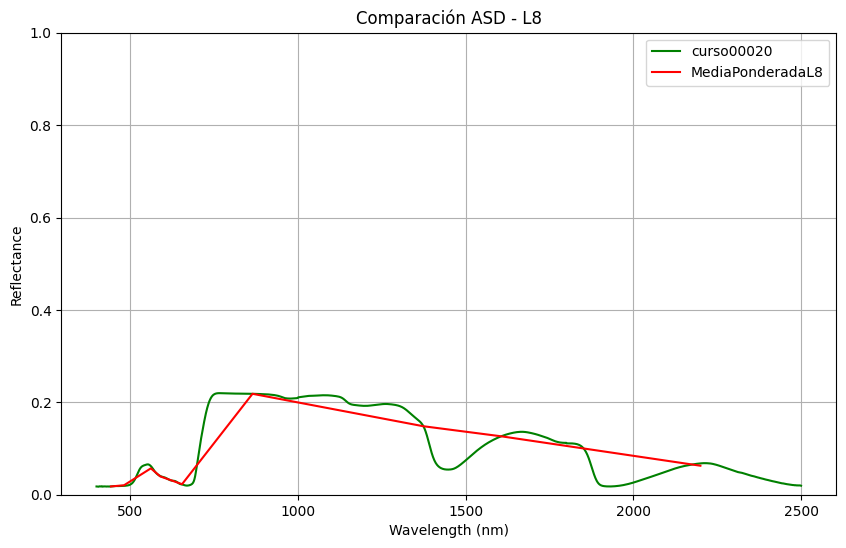

comenzamos!
    MediaPonderadaL8  Wavelength
B1          0.005690         443
B2          0.007162         482
B3          0.033797         562
B8          0.020720         590
B4          0.008389         655
B5          0.175807         865
B9          0.119231        1374
B6          0.099853        1609
B7          0.045737        2200


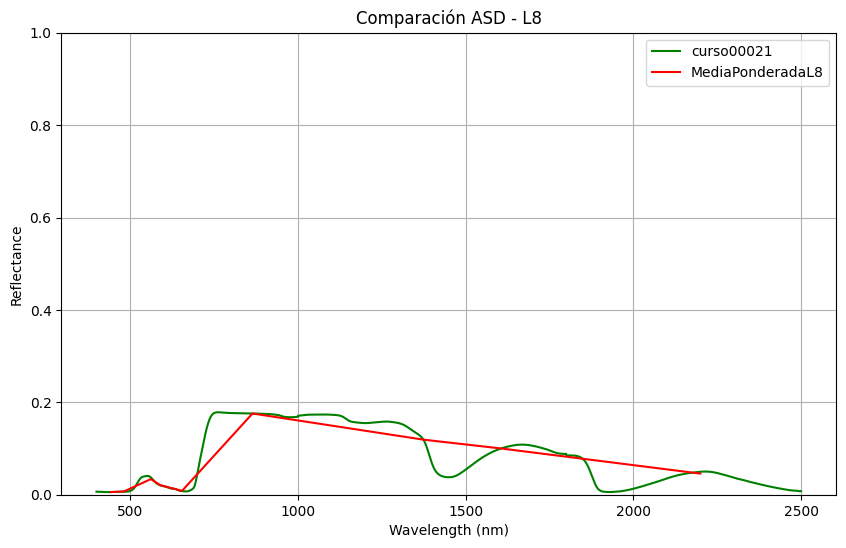

comenzamos!
    MediaPonderadaL8  Wavelength
B1          0.008372         443
B2          0.009964         482
B3          0.035310         562
B8          0.023088         590
B4          0.011318         655
B5          0.163519         865
B9          0.111391        1374
B6          0.094435        1609
B7          0.044686        2200


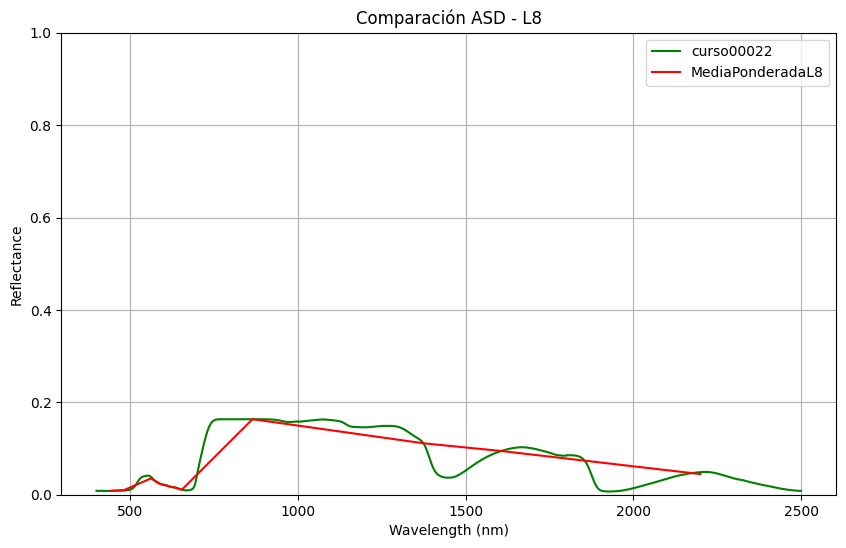

In [10]:
spec_path_txt = "/media/diego/Datos4/EBD/Cursos/AET_2024_NetOPS/Para_alumnos/Sesion4/4.1.procesado/Datos_TXT/2024_06_04/"


a = asd(sensores_table, spec_path_txt, 'L8')
a.txt2sat(spec_path_asd, "Vegetación")

for i in a.get_spectros():
    a = asd(sensores_table, i, 'L8')
    a.txt2sat(i)